In [1]:
import nengo
import nengo.spa as spa
from nengo.spa import Vocabulary
import numpy as np

In [2]:
rng = np.random.RandomState(12)
dim = 64*2

vocab = Vocabulary(dimensions=dim, rng=rng, max_similarity=0.02, unitary=True)

incr = vocab.parse("INCREMENT")
parity = vocab.parse("PARITY")

vocab.parse("ZERO")
vocab.add("ONE", vocab.parse("ZERO*INCREMENT"))
vocab.add("TWO", vocab.parse("ONE*INCREMENT"))
vocab.add("THREE", vocab.parse("TWO*INCREMENT"))
vocab.add("FOUR", vocab.parse("THREE*INCREMENT"))
vocab.add("FIVE", vocab.parse("FOUR*INCREMENT"))
vocab.add("SIX", vocab.parse("FIVE*INCREMENT"))
vocab.add("SEVEN", vocab.parse("SIX*INCREMENT"))
vocab.add("EIGHT", vocab.parse("SEVEN*INCREMENT"))
vocab.add("NINE", vocab.parse("EIGHT*INCREMENT"))
vocab.add("TEN", vocab.parse("NINE*INCREMENT"))
vocab.add("ELEVEN", vocab.parse("TEN*INCREMENT"))


zero = vocab.parse("NUMBER*ZERO+PARITY*EVEN")
one = vocab.parse("NUMBER*ONE+PARITY*ODD")
two = vocab.parse("NUMBER*TWO+PARITY*EVEN")
three = vocab.parse("NUMBER*THREE+PARITY*ODD")
four = vocab.parse("NUMBER*FOUR+PARITY*EVEN")
five = vocab.parse("NUMBER*FIVE+PARITY*ODD")
six = vocab.parse("NUMBER*SIX+PARITY*EVEN")
seven = vocab.parse("NUMBER*SEVEN+PARITY*ODD")
eight = vocab.parse("NUMBER*EIGHT+PARITY*EVEN")
nine = vocab.parse("NUMBER*NINE+PARITY*ODD")
ten = vocab.parse("NUMBER*TEN+PARITY*EVEN")
eleven = vocab.parse("NUMBER*ELEVEN+PARITY*ODD")

vocab.add("ZERO_W", zero)
vocab.add("ONE_W", one)
vocab.add("TWO_W", two)
vocab.add("THREE_W", three)
vocab.add("FOUR_W", four)
vocab.add("FIVE_W", five)
vocab.add("SIX_W", six)
vocab.add("SEVEN_W", seven)
vocab.add("EIGHT_W", eight)
vocab.add("NINE_W", nine)
vocab.add("TEN_W", ten)
vocab.add("ELEVEN_W", eleven)

/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=128, M=14)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=128, M=15)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=128, M=16)
  len(self.pointers)))


In [3]:
# Compute the transformation and convert it into a SP object
T = (~zero*one + ~one*two + ~two*three + ~three*four + ~four*five).v / 1 # 5
T = spa.SemanticPointer(T)

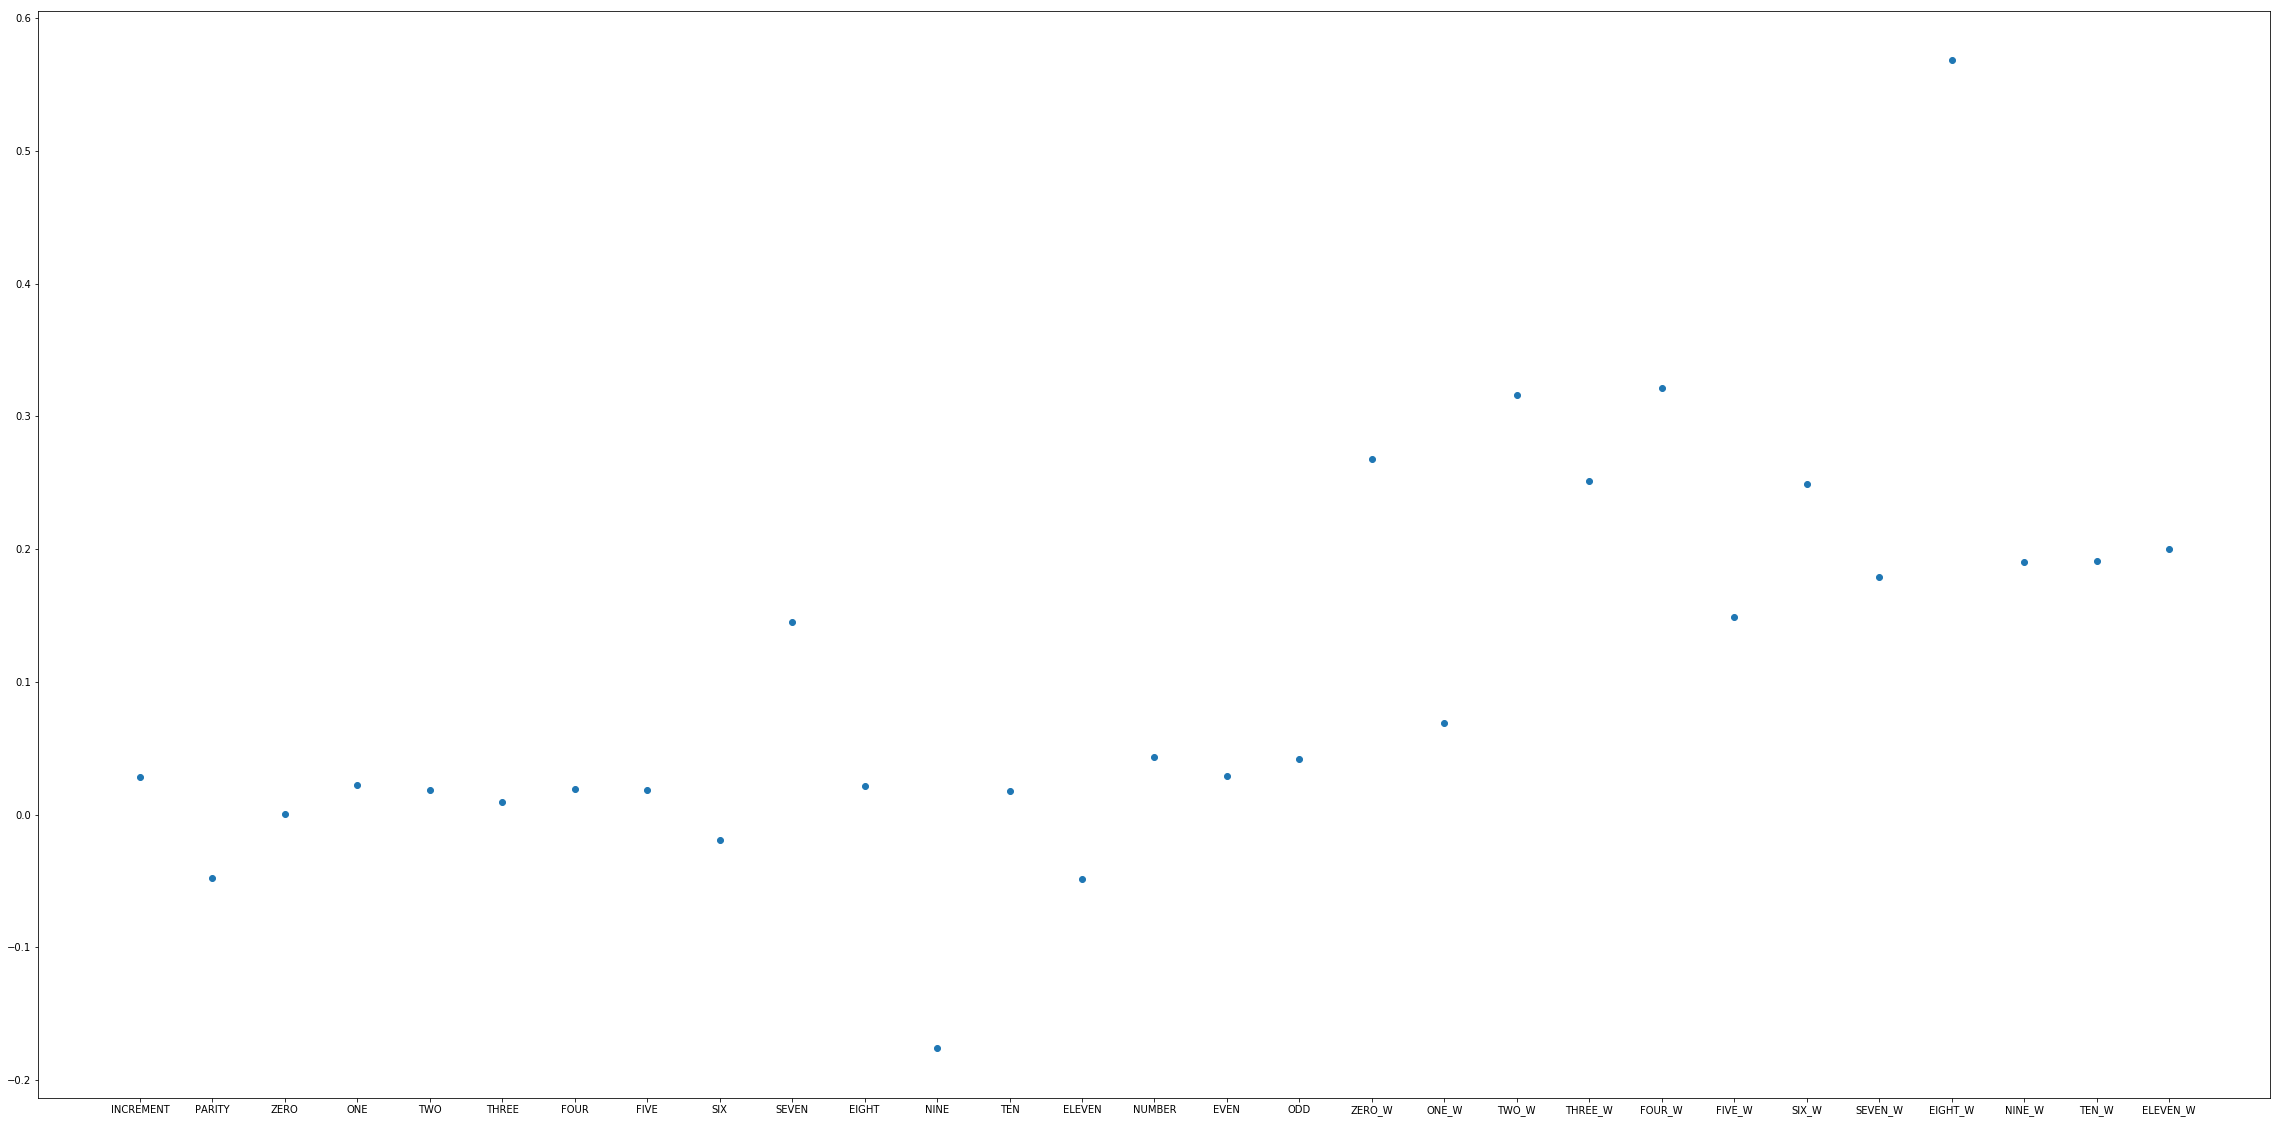

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


succ = (nine * ~T)
even_odd = ~parity*succ
test = succ.v

similarity = []
for sp_name in vocab.keys:
    vec = vocab.parse(sp_name)
    similarity.append(vec.compare(test))  # dot product after normalizing vectors
 

plt.figure(figsize = (40,20))    
plt.plot(vocab.keys, similarity, 'o', label=vocab.keys)   

Succ1 works, succ2 doesn't always work (works for training examples, but not for test), succ3 doesn't work. The solution is to clean up the vector after applying every succ transformation before applying the next one.

While successor relationship is beautifully captured, even-odd also seems to be beautifully captured now that I see it (because I increased the dimensions to 64*2 from 64). 

The threshold for even-odd would have to be around 0.2 though since succ is already at 0.5 and decoding even-odd from it is noisy.